# Bayesian inference
 
 Bayesian inference is a way of reasoning that combines prior knowledge and data to estimate the probability of a hypothesis. In the Bayesian model, prior knowledge is understood as what you already know or believe about a situation based on your experience, expertise, or assumptions. On the other hand, data is new evidence that you collect as a result of observations, experiments, or surveys. The probability of a hypothesis is how likely it is to be true, considering both the prior knowledge and data.

Bayesian inference consists of three steps.

1. We choose a probability density function to model the parameter $θ$, that is, the a priori distribution $P(θ)$. This is our best guess on the parameters before we get the data $X$.

2.  We choose a probability density function for $P(X|θ)$. Essentially we are modeling how the data $X$ will look like with the given parameter $θ$.

3.  We compute the posterior distribution $P(θ|X)$ and choose the $θ$ with the highest $P(θ|X)$.

As a result, the posterior distribution becomes the new a priori distribution. The third step needs to be repeated each time new data arrives.
## Mathematical equation of Bayesian Inference

Bayesian inference uses a mathematical formula called Bayes' theorem to update the probability of a hypothesis as new data becomes available.

$$ 
\mathrm{P(θ|X)} = \frac{P(X|\theta)\times P(\theta)} { P(X)}
$$

where  $P(X|θ)$ - the likelihood, that is, the distribution of the observed data $X$ conditional on the parameter $θ$ (theta):

$P(θ)$ - prior distribution

$P(θ|X)$ -posterior distribution


 Bayesian inference has 3 basic blocks and these are:
 

 The first building block of a  parametric  of Bayesian inference is *likehood* 
$$
\boldsymbol P(X|θ)
$$
When the paramters of the distribution generated by the data are equal to $θ$, the probability density of $X$

No we assume that $X$ and $θ$ are continous. We will discuss later how to relax this assumption.

*The prior*

The second building block our inference is the prior
$$
\boldsymbol P(θ)
$$
The prior is the subjective probability density associated with the parameter $θ$

*The posterior*

After obseving data $X$, we operate Bayes' rule to update the prior  about the parameter $θ$(the formula is given below)

Suppose that we fit a model with parameters $\boldsymbol w$ to the dataset $\boldsymbol D = (\boldsymbol X, \boldsymbol y)$. According to the Bayes formula the posterior distribution

$$
    p(\boldsymbol w \vert \boldsymbol X, \boldsymbol y) \propto p(\boldsymbol y \vert \boldsymbol X, \boldsymbol w) p(\boldsymbol w).
$$


We are particularly interested in the posterior distribution because it allows us to make predictions.

**Q**. How to calculate evidence?

## Conjugate distributions

## Bayes rule

Since 

$$
p(\boldsymbol x , y) = p(\boldsymbol x \vert y) p(y) = p(y \vert \boldsymbol x) p(\boldsymbol x),
$$

we have

$$
    p(y \vert \boldsymbol x) = \frac{p(\boldsymbol x \vert y) p(y)}{p(\boldsymbol x)} = 
     \frac{p(\boldsymbol x \vert y)p(y)}{\int p(\boldsymbol x \vert y) p(y)\,dy}.
$$



### Probability Distribution functions in dynamic graph
source: https://www.datacamp.com/tutorial/probability-distributions-python

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, widgets
from scipy.stats import uniform, norm, expon, bernoulli, binom, poisson

In [5]:
def generate_graph(distribution_type, parameter_1, parameter_2):
    x = np.linspace(0, 1, 1000) # theta

    if distribution_type == 'Uniform':
        # x = 1000 # theta
        y = uniform.pdf(x, loc=parameter_1, scale=parameter_2)
        title = f"Uniform distribution: start={parameter_1}, width{parameter_2}"
    elif distribution_type == 'Normal':
        y = norm.pdf(x, loc=parameter_1, scale=parameter_2)
        title = f"Normal distribution: mean of the distribution={parameter_1}, standard deviation={parameter_2}"
    elif distribution_type == 'Exponential':
        y = expon.pdf(x, loc=parameter_1, scale=parameter_2)
        title = f"Exponential distribution: loc={parameter_1}, 1/lambda={parameter_2}"
    elif distribution_type == 'Bernouli':
        y = bernoulli.pmf(x, p=parameter_1)
        title = f"Bernouli distribution: probability of success={parameter_1} (<= 1)"
    elif distribution_type == 'Binomial':
        y = binom.pmf(x, n=int(parameter_1), p=parameter_2)
        title = f"Binomial distribution: n={int(parameter_1)}, probability of success=={parameter_2} (<= 1)"
    elif distribution_type == 'Poisson':
        y = poisson.pmf(x, mu=int(parameter_1))
        title = f"Poisson distribution: lambda={int(parameter_1)}"
    else:
        return

    plt.figure(figsize=(6, 3))
    plt.plot(x, y, label=distribution_type)
    plt.title(title)
    plt.xlabel('Theta')
    plt.ylabel('')
    plt.legend()
    plt.grid(True)
    plt.show()

choose_dist_type = widgets.Dropdown(
    options=['Uniform', 'Normal', 'Exponential', 'Bernouli', 'Binomial', 'Poisson'],
    value='Uniform',
    description='Distribution type:'
)

parameter_1 = widgets.FloatSlider(value=0, min=0, max=10, step=0.1, description='Parameter 1')
parameter_2 = widgets.FloatSlider(value=1, min=0, max=10, step=0.1, description='Parameter 2')


interact_plot = interact(
    generate_graph,
    distribution_type=choose_dist_type,
    parameter_1 = parameter_1,
    parameter_2 = parameter_2
)

interactive(children=(Dropdown(description='Distribution type:', options=('Uniform', 'Normal', 'Exponential', …

### Discrete likelihood | Beta-binomial model

Example with soccer dataset https://www.kaggle.com/datasets/irkaal/english-premier-league-results

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta, binom
import pandas as pd

Lets look at the data. The main columns that we'll work are **Season** and **FTR = Full Time Result (H=Home Win, D=Draw, A=Away Win)** 

In [7]:
df = pd.read_csv("dataset_for_bayes_inference/results.csv", encoding='latin-1')
df.tail()

,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
11108,2021-22,2022-04-09T17:30:00Z,Aston Villa,Tottenham,0,4,A,0.0,1.0,A,...,8.0,5.0,9.0,3.0,12.0,14.0,2.0,3.0,0.0,0.0
11109,2021-22,2022-04-10T14:00:00Z,Brentford,West Ham,2,0,H,0.0,0.0,D,...,7.0,1.0,4.0,6.0,2.0,6.0,0.0,1.0,0.0,0.0
11110,2021-22,2022-04-10T14:00:00Z,Leicester,Crystal Palace,2,1,H,2.0,0.0,H,...,3.0,3.0,3.0,4.0,11.0,12.0,1.0,1.0,0.0,0.0
11111,2021-22,2022-04-10T14:00:00Z,Norwich,Burnley,2,0,H,1.0,0.0,H,...,6.0,4.0,6.0,7.0,12.0,10.0,1.0,1.0,0.0,0.0
11112,2021-22,2022-04-10T16:30:00Z,Man City,Liverpool,2,2,D,2.0,1.0,H,...,5.0,4.0,4.0,1.0,9.0,11.0,1.0,4.0,0.0,0.0


We will select matches of Home Teams (local teams) from 2015 season to 2020 and try to observe new data which will be matches from 2020-2021 season

In [8]:
selected_matches = df.query("Season in ['2015-16', '2016-17','2017-18', '2018-19', '2019-20']")
selected_matches_number = len(selected_matches)
print("Seasons from 2015 to 2020: ",selected_matches_number)

Seasons from 2015 to 2020:  1900


As a prior belief will be a win rate of the selected matches

In [9]:
home_wins = len(selected_matches[selected_matches['FTR'] == 'H'])
home_win_rate = round(home_wins/selected_matches_number,2)
print("Win rate: ", home_win_rate)

Win rate:  0.46


$\alpha$ and $\beta$ positive parameters control the shape of the distribution. Prior parameters:

In [10]:
alpha_param = home_win_rate * selected_matches_number
beta_param = selected_matches_number - alpha_param

print(alpha_param, beta_param)

874.0 1026.0


Selected matches from 2020 to 2021

In [11]:
selected_matches_20_21 = df.query("Season == '2020-21'")
selected_matches_20_21_num = len(selected_matches_20_21)

home_wins_20_21 = len(selected_matches_20_21[selected_matches_20_21['FTR'] == 'H'])
win_rate_20_21 = round(home_wins_20_21/selected_matches_20_21_num,2)

print(" Selected matches from 2020-21: ", selected_matches_20_21_num, "\n", "Win matches: ", home_wins_20_21, "\n", "Win rate: ", win_rate_20_21)

 Selected matches from 2020-21:  380 
 Win matches:  144 
 Win rate:  0.38


Posterior parameters are:

$$ \alpha’ = \alpha + y $$
$$ \beta’ = n - y + \beta$$



In [12]:
alpha_pos_param = alpha_param + home_wins_20_21
beta_pos_param = selected_matches_20_21_num - home_wins_20_21 + beta_param
print(alpha_pos_param, beta_pos_param)

1018.0 1262.0


Lets calculate prior, likelihood and posterior of our selected data

In [13]:
n = selected_matches_20_21_num
y = home_wins_20_21

theta = np.linspace(0,1,1000) # parameter array represents a possible value of the parameter for the beta distribution

prior = beta.pdf(theta, alpha_param, beta_param)
likelihood = binom.pmf(y, n, theta) 
posterior = beta.pdf(theta, alpha_pos_param, beta_pos_param) 


In [14]:
def plot_show(theta, prior, likelihood, posterior, l_factor):
    plt.figure(figsize=(10, 6))

    plt.plot(theta, prior, label="prior")
    ''' 
    l_factor for scaling the likelihood curve to distinguish the 
    likelihood curve from the prior and posterior curves in the plot
    Because likelihood function typically has a smaller curve.
    But scaling the likelihood function isn't required by math.
    '''
    plt.plot(theta, l_factor * likelihood, label="likelihood")
    plt.plot(theta, posterior, label="posterior")

    plt.ylabel("y")
    plt.xlabel("x")
    plt.xlim([0, 1])
    plt.legend()
    plt.xticks(np.arange(0, 1, 0.1))
    plt.show()

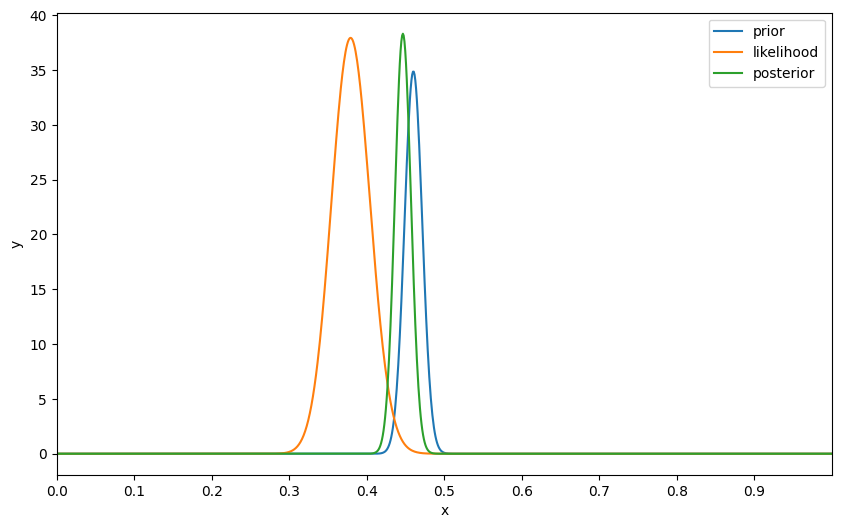

In [15]:
plot_show(theta, prior, likelihood, posterior, l_factor=900)

After seeing the graph we can observe that the blue line describes our prior belief which is more than 0.4 on x-axis (we already defined this value as 0.46), likelihood function shown as an orange curve has highest probability value less than 0.4, and posterior's green curve is around 0.45 after seeing our data from 2020 to 2021. <br> The posterior' value is less than our prior belief which means that **the probability changed** after observing the new data. Now our local teams have a winning probability of around 0.45.

### Uninformative value

What if we don't consider the prior belief of our data? On the previous example a prior belief was calculated from the matches between 2015-2020. New data were from 2020-2021. We know that during this period was COVID-19 and maybe this affected to our players. <br> <br> Calculating with minimal prior belief called **uninformative prior**. Uniformative prior has equal weights for all possible values of the parameter. This means that all values of the parameter are equally likely before we see any data.

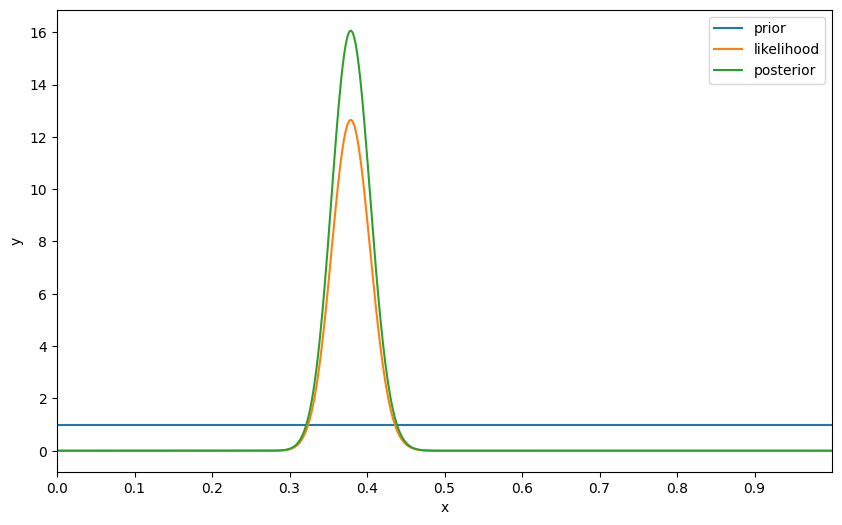

In [16]:
alpha_param = 1
beta_param = 1

alpha_pos_param = alpha_param + y
beta_pos_param = n - y + beta_param

prior = beta.pdf(theta, alpha_param, beta_param)
likelihood = binom.pmf(y, n, theta) 
posterior = beta.pdf(theta, alpha_pos_param, beta_pos_param) 

plot_show(theta, prior, likelihood, posterior, l_factor=300)

After observing our data in the graph we can see 3 lines. Our prior blue line is flat which means all values of the parameter are equally likely before seeing any data. The likelihood orange curve has a value around 0.4 (or less than 0.4). The same value can be observed in the posterior green curve but it is more spread out than the likelihood function.